# CLUSTERING IN MALL DATA TO IDENTIFY CUSTOMER TYPES.

In [4]:
import pandas as pd
from sklearn.cluster import KMeans
import matplotlib.pyplot as plt

mall_data = pd.read_csv("./Mall_Customers.csv")
mall_data.head()

,CustomerID,Genre,Age,Annual Income (k$),Spending Score (1-100)
0,1,Male,19,15,39
1,2,Male,21,15,81
2,3,Female,20,16,6
3,4,Female,23,16,77
4,5,Female,31,17,40


In [5]:
mall_data[["Annual Income (k$)" , "Spending Score (1-100)"]]

,Annual Income (k$),Spending Score (1-100)
0,15,39
1,15,81
2,16,6
3,16,77
4,17,40
5,17,76
6,18,6
7,18,94
8,19,3
9,19,72


In [10]:
cust_data = mall_data.iloc[:, [3,4]].values
cust_data

array([[ 15,  39],
       [ 15,  81],
       [ 16,   6],
       [ 16,  77],
       [ 17,  40],
       [ 17,  76],
       [ 18,   6],
       [ 18,  94],
       [ 19,   3],
       [ 19,  72],
       [ 19,  14],
       [ 19,  99],
       [ 20,  15],
       [ 20,  77],
       [ 20,  13],
       [ 20,  79],
       [ 21,  35],
       [ 21,  66],
       [ 23,  29],
       [ 23,  98],
       [ 24,  35],
       [ 24,  73],
       [ 25,   5],
       [ 25,  73],
       [ 28,  14],
       [ 28,  82],
       [ 28,  32],
       [ 28,  61],
       [ 29,  31],
       [ 29,  87],
       [ 30,   4],
       [ 30,  73],
       [ 33,   4],
       [ 33,  92],
       [ 33,  14],
       [ 33,  81],
       [ 34,  17],
       [ 34,  73],
       [ 37,  26],
       [ 37,  75],
       [ 38,  35],
       [ 38,  92],
       [ 39,  36],
       [ 39,  61],
       [ 39,  28],
       [ 39,  65],
       [ 40,  55],
       [ 40,  47],
       [ 40,  42],
       [ 40,  42],
       [ 42,  52],
       [ 42,  60],
       [ 43,

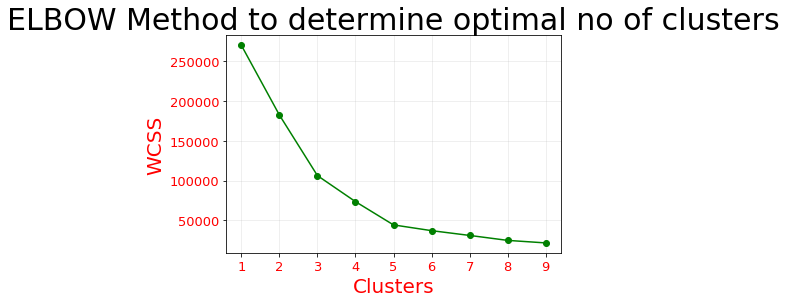

In [21]:
# Calculate WCSS and Find our Elbow

clusters = range(1,10)
WCSS = []

for k in clusters:
    model= KMeans(n_clusters =k)
    model.fit(cust_data)
    WCSS.append(model.inertia_)
    
    
    
plt.plot(clusters , WCSS , marker = "o" , color = "green")
plt.title("ELBOW Method to determine optimal no of clusters" , size = 30 )
plt.xlabel("Clusters" , size = 20 , color ="r")
plt.ylabel("WCSS" , size =20 , color= "r")
plt.xticks(size = 13 , color= "r")
plt.yticks(size = 13 , color ="r")
plt.grid(alpha = 0.25)
plt.show()


So we can conclude from the above line chart that 5 would be the optimal number of clusters for our customer data.

In [22]:
# Fit the Dataset using k = 5 

model = KMeans(n_clusters = 5)
model.fit(cust_data)

model

KMeans(algorithm='auto', copy_x=True, init='k-means++', max_iter=300,
    n_clusters=5, n_init=10, n_jobs=1, precompute_distances='auto',
    random_state=None, tol=0.0001, verbose=0)

In [23]:
#Predict our model to give us cluster labels

labels = model.predict(cust_data)
labels

array([0, 3, 0, 3, 0, 3, 0, 3, 0, 3, 0, 3, 0, 3, 0, 3, 0, 3, 0, 3, 0, 3,
       0, 3, 0, 3, 0, 3, 0, 3, 0, 3, 0, 3, 0, 3, 0, 3, 0, 3, 0, 3, 0, 1,
       0, 3, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 2, 4, 2, 1, 2, 4, 2, 4, 2,
       1, 2, 4, 2, 4, 2, 4, 2, 4, 2, 1, 2, 4, 2, 4, 2, 4, 2, 4, 2, 4, 2,
       4, 2, 4, 2, 4, 2, 4, 2, 4, 2, 4, 2, 4, 2, 4, 2, 4, 2, 4, 2, 4, 2,
       4, 2, 4, 2, 4, 2, 4, 2, 4, 2, 4, 2, 4, 2, 4, 2, 4, 2, 4, 2, 4, 2,
       4, 2], dtype=int32)

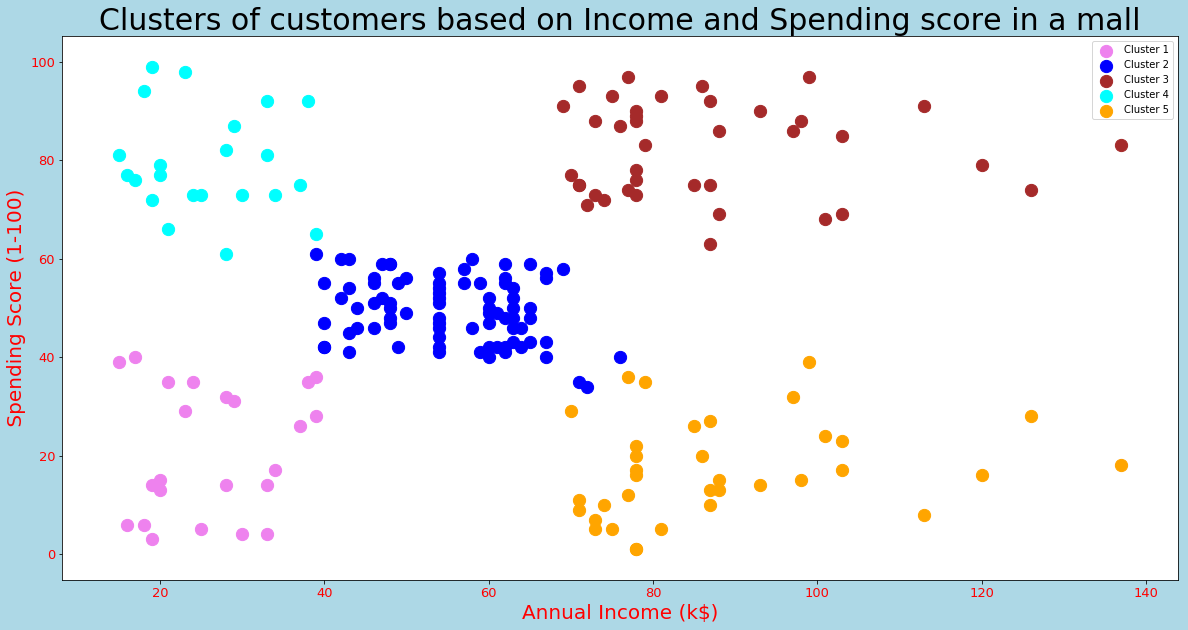

In [42]:
#create a scatterplot of all 5 clusters

plt.figure(figsize=(20,10) , facecolor = "lightblue")

plt.scatter(cust_data[ labels == 0 ,0 ], cust_data[ labels == 0 ,1], s = 150 , c = "violet", label = "Cluster 1",)
plt.scatter(cust_data[ labels == 1, 0 ], cust_data[ labels == 1, 1], s = 150 , c = "blue",   label = "Cluster 2")
plt.scatter(cust_data[ labels == 2 , 0], cust_data[ labels == 2 ,1], s = 150 , c = "brown" , label = "Cluster 3")
plt.scatter(cust_data[ labels == 3 , 0], cust_data[ labels == 3 ,1], s = 150 , c = "cyan",   label = "Cluster 4")
plt.scatter(cust_data[ labels == 4 , 0], cust_data[ labels == 4, 1], s = 150 , c = "orange",label = "Cluster 5")

plt.xlabel("Annual Income (k$)" , size = 20 , color = "red")
plt.ylabel(" Spending Score (1-100) " , size = 20 , color = "red")
plt.title("Clusters of customers based on Income and Spending score in a mall" , size = 30)
plt.xticks(size = 13 , color="r")
plt.yticks(size = 13 , color="r")
plt.legend()
plt.show()





From the above scatterplot we can conclude that the most stable spending score belongs to Cluster 2 who have an annual income between 40-75k approx , Cluster 1 has a lower income between 15 to 40k and thus have a lower spending score up to 40 points and Cluster 5 shares the same spending score even though it has a much higher income between 70-140k approx. The riskiest Cluster is cluster 4 as their spending score is high between 60 to 100 points even though their income is low between 15 to 40k , Cluster 3 is the high-end customer who have a high income between 70k to 140k and are also a high spending score between 60 to a 100 points. 